In [45]:
import geopandas as gpd
from shapely import LineString, Point
import matplotlib.pyplot as plt
import numpy as np

# Dataset

In [2]:
edges = gpd.read_file('map-edges.gpkg')
nodes = gpd.read_file('map-nodes.gpkg')
truth = gpd.read_file('ground-truths.gpkg')
rawtr = gpd.read_file('raw-trajectory.gpkg')
synth = gpd.read_file('synthetic-data.gpkg')

In [3]:
nodes

,osmid,y,x,compressed_id,geometry
0,366372433,1.215633e+06,650430.259238,0,POINT (650430.259 1215633.107)
1,7251842686,1.215617e+06,650570.942426,1,POINT (650570.942 1215616.697)
2,7251774053,1.215637e+06,650325.182449,2,POINT (650325.182 1215636.828)
3,7258455914,1.215454e+06,650488.453585,3,POINT (650488.454 1215453.512)
4,366389789,1.215531e+06,651137.190174,4,POINT (651137.19 1215530.994)
...,...,...,...,...,...
146257,10991860089,1.149122e+06,708911.779484,146257,POINT (708911.779 1149122.168)
146258,12712705291,1.149992e+06,709157.651409,146258,POINT (709157.651 1149991.723)
146259,13266256212,1.148725e+06,709873.399449,146259,POINT (709873.399 1148724.597)
146260,13266256218,1.148763e+06,709716.362626,146260,POINT (709716.363 1148762.646)


In [132]:
list(edges['geometry'].iloc[100].coords)

[(650586.8150955847, 1215615.497730322),
 (650653.1165035276, 1215607.8275577265),
 (650741.974662553, 1215595.0296028682)]

In [5]:
truth

,geometry
0,"LINESTRING (696973.748 1202610.539, 696973.845..."
1,"LINESTRING (676965.889 1187775.109, 676947.422..."
2,"LINESTRING (681130.99 1187005.378, 681130.99 1..."
3,"LINESTRING (681959.842 1145649.393, 681950.127..."
4,"LINESTRING (687090.367 1196018.811, 687090.367..."
...,...
179,"LINESTRING (652245.18 1205381.046, 652245.142 ..."
180,"LINESTRING (680705.695 1188961.84, 680706.639 ..."
181,"LINESTRING (643161.146 1205084.212, 643161.146..."
182,"LINESTRING (680705.695 1188961.84, 680706.639 ..."


In [6]:
rawtr

,geometry
0,"LINESTRING (681310.99 1189335.165, 681341.835 ..."
1,"LINESTRING (697720.498 1202696.454, 697609.836..."
2,"LINESTRING (682014.297 1175052.958, 680854.261..."
3,"LINESTRING (678289.718 1167527.609, 678329.594..."
4,"LINESTRING (685480.307 1195913.467, 685347.838..."
...,...
179,"LINESTRING (670223.968 1201913.567, 671598.75 ..."
180,"LINESTRING (663713.052 1194090.418, 663557.323..."
181,"LINESTRING (652473.367 1204032.101, 652540.271..."
182,"LINESTRING (669992.523 1178414.386, 669584.733..."


In [7]:
sindex = edges.sindex
rawList = [sindex.nearest(Point(point))[1][0] for point in truth.iloc[10].geometry.coords]

In [8]:
from itertools import groupby

finalList = [k for k, g in groupby(rawList)]
finalList

[np.int64(167582),
 np.int64(167588),
 np.int64(167474),
 np.int64(167478),
 np.int64(74765),
 np.int64(99437),
 np.int64(167606),
 np.int64(167601),
 np.int64(167607),
 np.int64(167609),
 np.int64(270229),
 np.int64(167668),
 np.int64(167957),
 np.int64(167600),
 np.int64(99439),
 np.int64(125081),
 np.int64(168037),
 np.int64(233351),
 np.int64(185866),
 np.int64(167625),
 np.int64(74276),
 np.int64(74278),
 np.int64(184322),
 np.int64(72886),
 np.int64(74832),
 np.int64(72822),
 np.int64(74834),
 np.int64(118477),
 np.int64(74030),
 np.int64(74080),
 np.int64(74083),
 np.int64(72876),
 np.int64(73567),
 np.int64(72800),
 np.int64(73567),
 np.int64(73840),
 np.int64(73568),
 np.int64(73790),
 np.int64(73787),
 np.int64(73789),
 np.int64(230299),
 np.int64(230300),
 np.int64(230301),
 np.int64(74191),
 np.int64(74195),
 np.int64(72670),
 np.int64(72675),
 np.int64(73455),
 np.int64(104757),
 np.int64(177606),
 np.int64(50532),
 np.int64(124590),
 np.int64(167869),
 np.int64(137116),
 

In [127]:
def getPoint (gdf, ID):
    line = gdf.iloc[ID].geometry
    return list(line.xy[0]), list(line.xy[1])

def visualize (edges, rawTrajectory, groundTruth, syntheticData, ID = 0):
    rawGPS, trueGPS, synthGPS = rawTrajectory.iloc[[ID]], groundTruth.iloc[[ID]].geometry, syntheticData.iloc[[ID]].geometry

    fig, ax = plt.subplots(1, 1, figsize=(20, 24))
    edges.plot(ax = ax, color = 'lightgray', linewidth = 1, label = 'Road edges', zorder = 1)
    # trueGPS.plot(ax = ax, color = 'green', linewidth = 2, label = 'True GPS (provided data)', zorder = 2)
    # rawGPS.plot(ax = ax, color = 'blue', linewidth = 2, label = 'Raw GPS (provided data)', zorder = 4)
    # synthGPS.plot(ax = ax, color = 'orange', linewidth = 2, label = 'Synthetic Data', zorder = 6)

    highlight = edges[edges['index'].isin(edgeList)]
    highlight.plot(ax = ax, color = 'black', zorder = 9)

    # x, y = list(errorLS[0].xy[0]), list(errorLS[0].xy[1])
    # ax.plot(x, y, color = 'darkgreen', marker = 'o', markersize = 4, zorder = 3)

    x, y = getPoint(groundTruth, ID)
    ax.scatter(x, y, color = 'darkgreen', marker = 'o', s = 16, zorder = 3)
    # x, y = getPoint(rawTrajectory, ID)
    # ax.scatter(x, y, color = 'darkblue', marker = 'o', s = 16, zorder = 5)
    # x, y = getPoint(syntheticData, ID)
    # ax.scatter(x, y, color = 'darkorange', marker = 'o', s = 16, zorder = 7)

    minx, miny, maxx, maxy = trueGPS.total_bounds
    # minx, miny, maxx, maxy = x[0], y[0], x[1], y[1]

    buffer = 100
    ax.set_xlim(minx - buffer, maxx + buffer)
    ax.set_ylim(miny - buffer, maxy + buffer)

    ax.set_title('Street map and GPS Trajectories data')
    ax.legend(loc='lower left')
    plt.show()

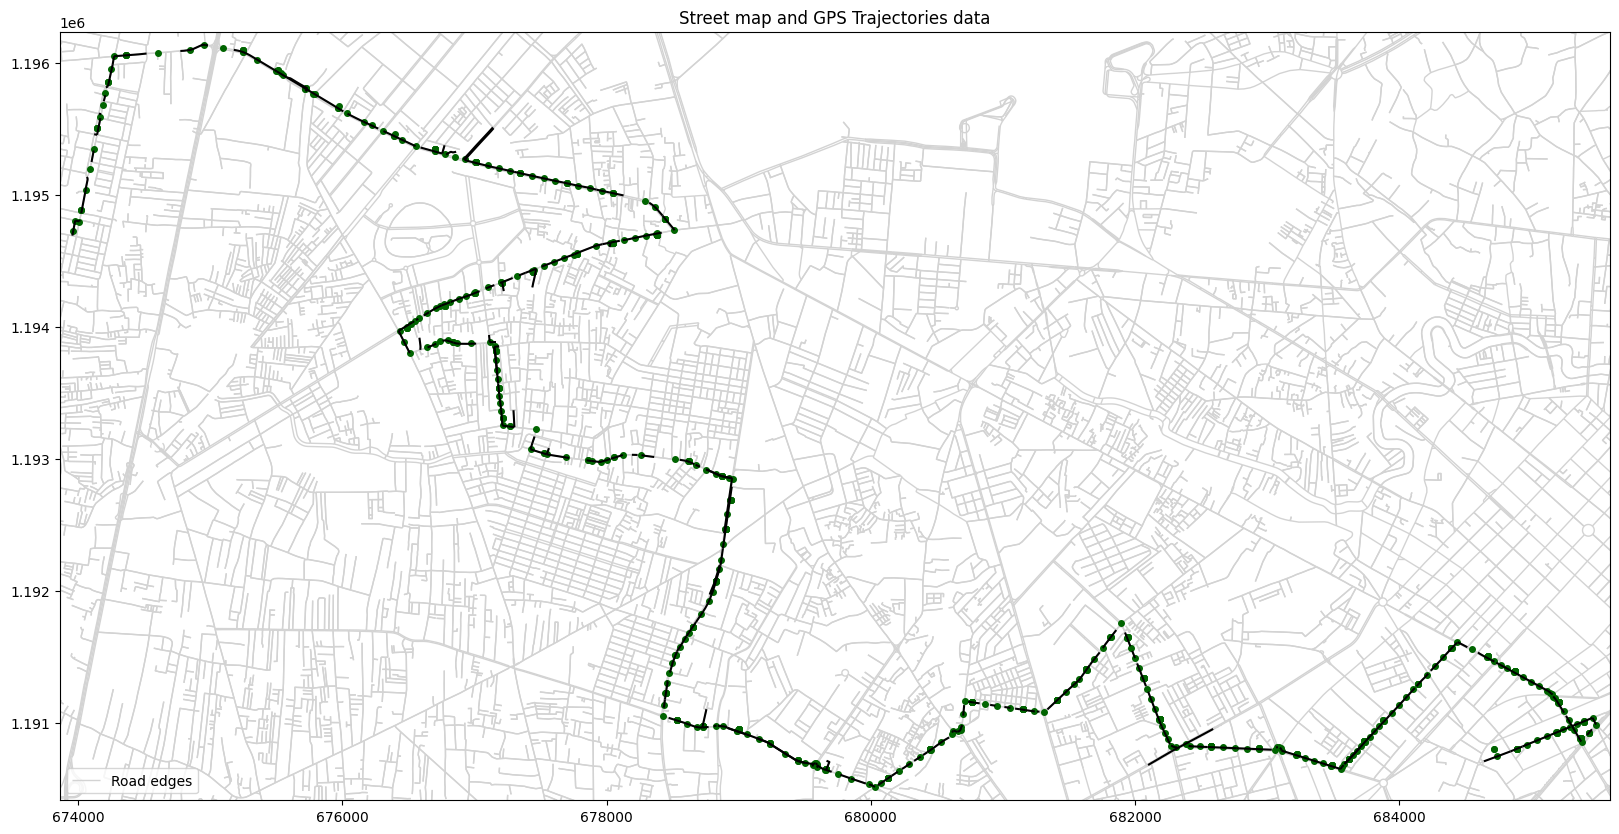

In [128]:
visualize(edges, rawtr, truth, synth, 10)

# Evaluation

In [120]:
def fastSearch (lineString, buffer = 5):
    search_area = lineString.buffer(buffer)
    candidate_inds = edges.sindex.query(search_area, predicate='intersects')
    candidates = edges.iloc[candidate_inds]

    if not candidates.empty:
        intersection_lengths = candidates.intersection(search_area).length
        best_match_idx = intersection_lengths.idxmax()
        return best_match_idx
    else:
        return None

In [123]:
pointList = list(truth.iloc[10].geometry.coords)
edgeList = []

for i in range(len(pointList) - 1):
    lineString = LineString([pointList[i], pointList[i + 1]])
    tolerances = [2.5, 5, 7.5, 10, 12.5, 15]
    for tolerance in tolerances:
        bestMatch = fastSearch(lineString, tolerance)
        if bestMatch != None:
            if len(edgeList) == 0 or bestMatch != edgeList[-1]:
                edgeList.append(bestMatch)
            break 

In [124]:
edgeList

[np.int64(167588),
 np.int64(167474),
 np.int64(167478),
 np.int64(74765),
 np.int64(167606),
 np.int64(167605),
 np.int64(270229),
 np.int64(167669),
 np.int64(167957),
 np.int64(167600),
 np.int64(99439),
 np.int64(125081),
 np.int64(233351),
 np.int64(185866),
 np.int64(167625),
 np.int64(74276),
 np.int64(74278),
 np.int64(184322),
 np.int64(72886),
 np.int64(74064),
 np.int64(74834),
 np.int64(118477),
 np.int64(74030),
 np.int64(74080),
 np.int64(74083),
 np.int64(72876),
 np.int64(72800),
 np.int64(73568),
 np.int64(73790),
 np.int64(73789),
 np.int64(73787),
 np.int64(73690),
 np.int64(230299),
 np.int64(230301),
 np.int64(74191),
 np.int64(74195),
 np.int64(72675),
 np.int64(104757),
 np.int64(177606),
 np.int64(50532),
 np.int64(124590),
 np.int64(167874),
 np.int64(137116),
 np.int64(240645),
 np.int64(52860),
 np.int64(83788),
 np.int64(181430),
 np.int64(161235),
 np.int64(161236),
 np.int64(161682),
 np.int64(37606),
 np.int64(37605),
 np.int64(181514),
 np.int64(137513),

In [133]:
edges.crs

<Projected CRS: EPSG:32648>
Name: WGS 84 / UTM zone 48N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 102°E and 108°E, northern hemisphere between equator and 84°N, onshore and offshore. Cambodia. China. Indonesia. Laos. Malaysia - West Malaysia. Mongolia. Russian Federation. Singapore. Thailand. Vietnam.
- bounds: (102.0, 0.0, 108.0, 84.0)
Coordinate Operation:
- name: UTM zone 48N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich